<a href="https://colab.research.google.com/github/AndrewKorn/physics_nsu/blob/main/finite_hole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Найти уровни энергии и построить соответствующие волновые функции в одномерной прямоугольной потенциальной яме шириной $a$ и глубиной $–U_0$**



##Уравнение Шредингера для областей внутри($Ι$) и снаружи($ΙΙ$) ямы

$\frac{ħ^2}{2m}𝛹^{''}_{Ι} + (E + U_0)𝛹_{Ι} = 0$ для $-\frac{a}{2} \leq x \leq \frac{a}{2}$

$\frac{ħ^2}{2m}𝛹^{''}_{ΙΙ} + E𝛹_{Ι
Ι} = 0$ для $|x| ≥ a$

Волновые функции могут быть либо симметричными либо антисимметричными в силу
симметрии потенциала. С учетом этого и непрерывности Ψ(x ) на границах ямы
получаются граничные условия, а из них уравнения на уровни энергии и вид симметричных
и антисимметричных решений. 


$k_1 = \sqrt{\frac{2m|E|}{ħ^2}}$

$k_2 = \sqrt{\frac{2m(E + U_0)}{ħ^2}}$

##Cимметричный случай


\begin{equation*}
𝛹(x) = 
 \begin{cases}
   A e^{k_1x} &\text{$x < -\frac{a}{2}$}\\
   B cos(k_2x) &\text{$x \in [-\frac{a}{2}; \frac{a}{2}]$} \\
   A e^{-k_1x} &\text{$x > \frac{a}{2}$}
 \end{cases}
\end{equation*}


Из непрерывности волновой функции и ее производной следуют следующие уровнения:

\begin{equation*}
 \begin{cases}
   A e^{-k_1 \frac{a}{2}} = B cos(k_2\frac{a}{2})
   \\
   k_1 A e^{-k_1 \frac{a}{2}} =k_2 B sin(k_2\frac{a}{2})
 \end{cases}
\end{equation*}

Получили систему двух линейных алгебраических уравнений относительно неизвестных
коэффициентов A, B. Система уравнений совместна, когда:

$tg(\frac{k_2a}{2}) = \frac{k_1}{k_2}$

или

$tg(\frac{\sqrt{2m(E+U_0)}a}{2ħ}) = \frac{\sqrt{|E|}}{\sqrt{E+U_0}}$

##Антисимметричный случай


\begin{equation*}
𝛹(x) = 
 \begin{cases}
   -A e^{k_1x} &\text{$x < -\frac{a}{2}$}\\
   B sin(k_2x) &\text{$x \in [-\frac{a}{2}; \frac{a}{2}]$} \\
   A e^{-k_1x} &\text{$x > \frac{a}{2}$}
 \end{cases}
\end{equation*}

Из непрерывности волновой функции и ее производной следуют следующие уровнения:

\begin{equation*}
 \begin{cases}
   A e^{-k_1 \frac{a}{2}} = B sin(k_2\frac{a}{2})
   \\
   -k_1 A e^{-k_1 \frac{a}{2}} =k_2 B cos(k_2\frac{a}{2})
 \end{cases}
\end{equation*}

Получили систему двух линейных алгебраических уравнений относительно неизвестных
коэффициентов A, B. Система уравнений совместна, когда:

$ctg(\frac{k_2a}{2}) = -\frac{k_1}{k_2}$

или

$ctg(\frac{\sqrt{2m(E+U_0)}a}{2ħ}) = -\frac{\sqrt{|E|}}{\sqrt{E+U_0}}$

##Решение уравнений

In [13]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as p

In [14]:
m = 1
U = 1
h = 1
a = 10

<module 'pylab' from '/usr/local/lib/python3.7/dist-packages/pylab.py'>

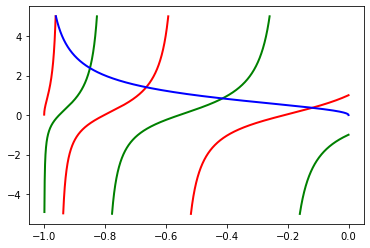

In [15]:
x = p.linspace(-U + 0.00001, 0, 10000)
tg = (p.sin(a * (2 * m * (x + U))**(1/2) / (2 * h))) / (p.cos(a * (2 * m * (x + U))**(1/2) / (2 * h)))
ctg = -(p.cos(a * (2 * m * (x + U))**(1/2) / (2 * h))) / (p.sin(a * (2 * m * (x + U))**(1/2) / (2 * h)))
right = (abs(x) / (U + x))**(1/2)

tol = 5
tg[tg > tol] = np.nan
tg[tg < -tol] = np.nan
ctg[ctg > tol] = np.nan
ctg[ctg < -tol] = np.nan
right[right > tol] = np.nan
right[right < -tol] = np.nan

p.plot(x, tg, 'r-', lw=2)
p.plot(x, ctg, 'g-', lw=2)
p.plot(x, right, 'b-', lw=2)
p

In [16]:
def derivative(f, x):
  h_ = 1e-8
  return (f(x + h_) - f(x)) / h_

def solver(f, x0, epsilon, max_iter):
  xn = x0
  for n in range(0, max_iter):
    y = f(xn)
    if abs(y) < epsilon:
      return xn
    slope = derivative(f, xn)
    if slope == 0:
      return None
    xn = xn - y / slope
  return None

def loop(f, L_bound, R_bound, increment):
  solutions = []
  while L_bound <= R_bound:
    solution = solver(f, L_bound, 1e-10, 1000)
    if solution is not None:
      solution = round(solution,4)
      if solution not in solutions:
        solutions.append(solution)
    L_bound += increment
  return solutions

In [17]:
angle_f = lambda x_: a * (2 * m * (x_ + U))**(1/2) / (2 * h)

tg_func = lambda x: (p.sin( angle_f(x) )) / (p.cos( angle_f(x) ))
ctg_func = lambda x: -(p.cos( angle_f(x) )) / (p.sin( angle_f(x) ))

right_func = lambda x: (abs(x) / (U + x))**(1/2)

tg_right_inter = lambda x: abs(tg_func(x) - right_func(x))
ctg_right_inter = lambda x: abs(ctg_func(x) - right_func(x))

find_from = -U + 1e-10
find_to = 0
step_val = 1e-3

tg_right_inter_sol = np.array(loop(tg_right_inter, find_from, find_to, step_val))
ctg_right_inter_sol = np.array(loop(ctg_right_inter, find_from, find_to, step_val))

tg_right_inter_sol = tg_right_inter_sol[np.logical_and(tg_right_inter_sol >= find_from, tg_right_inter_sol <= find_to)]
ctg_right_inter_sol = ctg_right_inter_sol[np.logical_and(ctg_right_inter_sol >= find_from, ctg_right_inter_sol <= find_to)]

full_solutions = np.concatenate((tg_right_inter_sol, ctg_right_inter_sol))
tg_right_inter_sol, ctg_right_inter_sol, full_solutions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


(array([-0.9622, -0.6647, -0.1193]),
 array([-0.8495, -0.4143]),
 array([-0.9622, -0.6647, -0.1193, -0.8495, -0.4143]))

##Энергетические уровни

In [18]:
def draw_pit():
  x1 = [i / 2.0 for i in range(-a * 2, -a + 1)]
  y1 = [0 for i in x1]

  x2 = [i / 2.0 for i in range(a, a * 2 + 1)]
  y2 = [0 for i in x2]

  y3 = [i for i in range(-U, 0 + 1)]
  x3 = [-a / 2 for i in y3 ]

  y4 = [i for i in range(-U, 0 + 1)]
  x4 = [a / 2 for i in y4 ]

  x5 = [i / 2.0 for i in range(-a, a + 1)]
  y5 = [-U for i in x5]


  plt.plot(x1, y1, color="black")
  plt.plot(x2, y2, color="black")
  plt.plot(x3, y3, color="black")
  plt.plot(x4, y4, color="black")
  plt.plot(x5, y5, color="black")

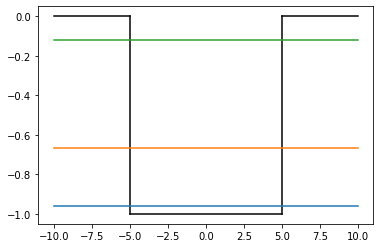

In [19]:
draw_pit()

qwerty = np.linspace(-a, a, 1000)
for en in tg_right_inter_sol:
  zxc = [en for i in qwerty]
  plt.plot(qwerty, zxc)

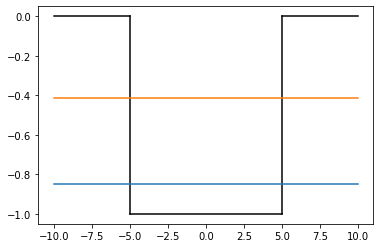

In [20]:
draw_pit()

qwerty = np.linspace(-a, a, 1000)
for en in ctg_right_inter_sol:
  zxc = [en for i in qwerty]
  plt.plot(qwerty, zxc)

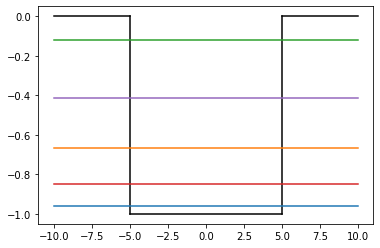

In [21]:
draw_pit()

qwerty = np.linspace(-a, a, 1000)
for en in full_solutions:
  zxc = [en for i in qwerty]
  plt.plot(qwerty, zxc)

##Волновые функции

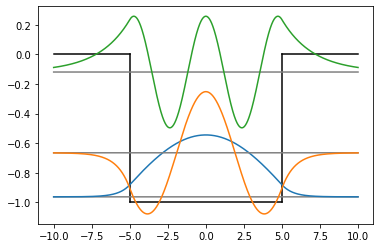

In [22]:
draw_pit()

qwerty = np.linspace(-a, a, 1000)

for en in tg_right_inter_sol:
  k1 = math.sqrt(2 * m * abs(en) / (h**2))
  k2 = math.sqrt(2 * m * (en + U) / (h**2))

  B =( k1 / ((math.cos(k2 * a / 2)**2+ k1 * (math.sin(k2 * a) / (2 * k2) + a / 2))))**(1/2)
  A = B * math.cos(k2 * a / 2) * math.exp(k1 * a / 2)

  def func(x):
    if (x <= -a /2):
      return A * (math.exp(k1 * x)) + en
    if (-a / 2 < x < a / 2):
      return B * math.cos(k2 * x) + en
    if (x >= a / 2):
      return A * math.exp(-k1 * x) + en

  x = np.linspace(-a, a, 10000)
  wave_func = [func(i) for i in x]
  energy = [en for i in x]
  plt.plot(x, energy, color='gray')
  plt.plot(x, wave_func)

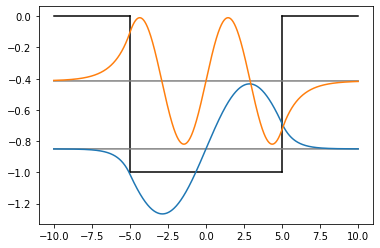

In [23]:
draw_pit()

qwerty = np.linspace(-a, a, 1000)
for en in ctg_right_inter_sol:
  k1 = math.sqrt(2 * m * abs(en) / (h**2))
  k2 = math.sqrt(2 * m * (en + U) / (h**2))

  B = (k1 / ((math.sin(k2 * a / 2)**2+ k1 * (-math.sin(k2 * a) / (2 * k2) + a / 2))))**(1/2)
  A = B * math.sin(k2 * a / 2) * math.exp(k1 * a / 2)

  def func(x):
    if (x < -a /2):
      return -A * (math.exp(k1 * x)) + en
    if (-a / 2 <= x <= a / 2):
      return B * math.sin(k2 * x) + en
    if (x > a / 2):
      return A * math.exp(-k1 * x) + en

  x = np.linspace(-a, a, 10000)
  wave_func = [func(i) for i in x]
  energy = [en for i in x]
  plt.plot(x, energy, color='gray')
  plt.plot(x, wave_func)